# Notebook for visualizing results from quiz no. 5 (2/24/20) and general trends
## fifth recitation, Intro to Neuroscience Spring 2020

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Create pandas dataframe with column names for quiz data

In [2]:
file = '/Users/maltegueth/Documents/raw_quiz_scores.csv'

columns = ['student', 'percent', 'score', 'corrects', 'blanks', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'quiz']
data = pd.read_csv(file, sep=',', names=columns)

In [3]:
data[150:160]

,student,percent,score,corrects,blanks,Q1,Q2,Q3,Q4,Q5,Q6,quiz
150,172005207,33,2,2,0,1,1,4,2,1,4,5
151,172005907,83,5,5,0,1,1,4,1,2,3,5
152,173001818,50,3,3,0,1,2,4,1,1,4,5
153,2089318,33,2,2,0,1,2,1,1,4,2,5
154,177009936,50,3,3,0,1,4,3,1,2,4,5
155,171007931,100,6,6,0,1,3,4,1,2,3,5
156,177009494,83,5,5,0,1,3,4,1,2,4,5
157,184008499,67,4,4,0,1,1,3,1,2,3,5
158,186003742,100,6,6,0,1,3,4,1,2,3,5
159,197005757,67,4,4,0,1,3,3,1,2,4,5


# Here are some basic stats from the dataframe (mean, median, sd)

### Specifically for quiz 4

In [4]:
data[data['quiz'] == 5].percent.mean()

68.89189189189189

In [5]:
data[data['quiz'] == 5].percent.median()

67.0

In [6]:
data[data['quiz'] == 5].percent.std()

22.93806126625907

### Averaged for the past four quizzes

In [7]:
data.percent.mean()

72.75842696629213

In [8]:
data.percent.median()

83.0

In [9]:
data.percent.std()

23.268102406556075

# Next, check some distributional plots to visualize how the class as a whole scored

### Again, first specifically for quiz 5

In [10]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

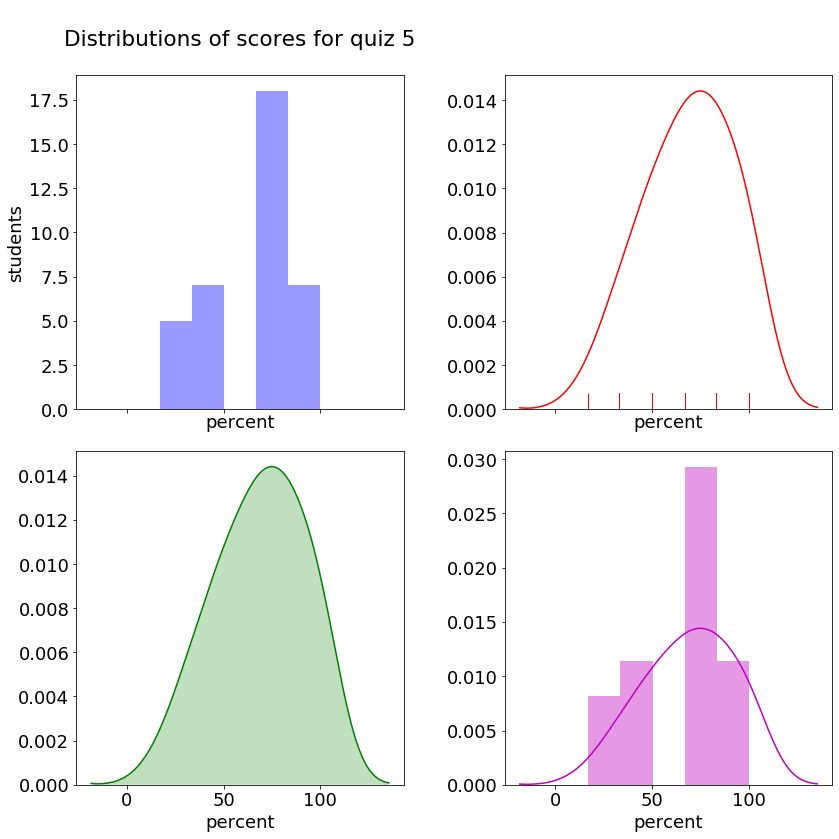

In [12]:
fig1, axes = matplotlib.pyplot.subplots(2, 2, figsize=(12, 12), sharex=True)

ax = sns.distplot(data[data['quiz'] == 5]['percent'], kde=False, color="b", ax=axes[0,0])
sns.distplot(data[data['quiz'] == 5]['percent'], hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(data[data['quiz'] == 5]['percent'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data[data['quiz'] == 5]['percent'], color="m", ax=axes[1, 1])

ax.set(ylabel='students')
ax.set(title='\nDistributions of scores for quiz 5\n')
matplotlib.pyplot.tight_layout()

### And for all four quizzes together

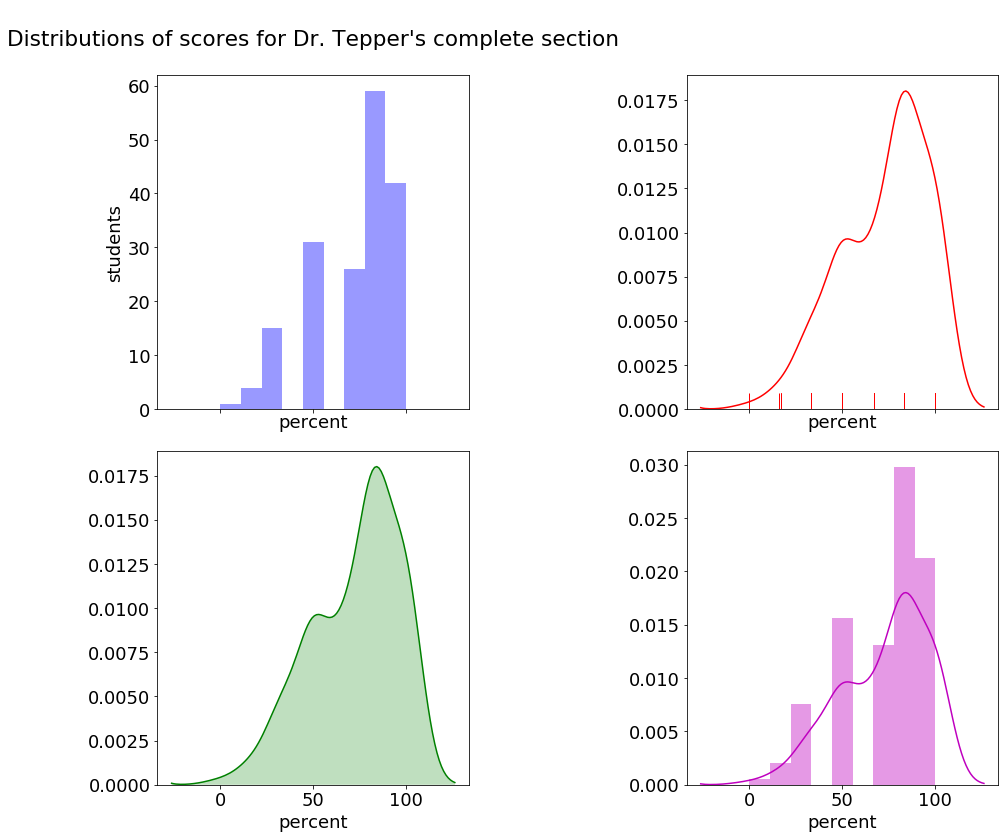

In [13]:
fig2, axes = matplotlib.pyplot.subplots(2, 2, figsize=(14, 12), sharex=True)

ax = sns.distplot(data['percent'], kde=False, color="b", ax=axes[0,0])
sns.distplot(data['percent'], hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(data['percent'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data['percent'], color="m", ax=axes[1, 1])

ax.set(ylabel='students')
ax.set(title="\nDistributions of scores for Dr. Tepper's complete section\n")
matplotlib.pyplot.tight_layout()

# Below are distributional plots for single questions and student answers

### As a reminder here are the questions from quiz 5

    The back of the retina contains two types of photoreceptor cells, _______ and _______
    a) rods, cones
    b) ganglion cells, bipolar cells
    c) horizontal cells, vertical cells
    d) rhodopsin, amacrine cells

    Which of the following statements about vision is false?
    a) Photoreceptors on the retina synapse with bipolar cells which in turn are connected to ganglion cells.
    b) The axons of ganglion cells form the optic nerve, which is also referred to as the blind spot.
    c) Color vision is enabled by three different types of rods.
    d) With the highest density of cones, the fovea is the point of the highest 
    visual acuity.

    Which of the following statements about audition is false:
    a) The cochlea is a fluid-filled organ in the inner ear.
    b) Hair cells are receptor cells within the cochlea, possessing a bundle of
    tiny hairs called stereocilia.
    c)Sounds are transmitted through movements of the oval window producing 
    a traveling wave in the basilar membrane within the cochlea.
    d) The primary auditory cortex represents information based on 
    volume.

    What information is represented by the somatosensory system?
    a) touch, pressure, pain, temperature
    b) sour, sweet, salty, and bitter 
    c) color vision
    d) exclusively pain

    Taste receptors are called _______  which are located _______.
    a) taste buds, on the tip of the tongue
    b) taste buds, all across the tongue
    c) granule cells, on the sides of the tongue 
    d) tufted cells, olfactory bulb

     Our ability to taste foods ...
    a) … depends on molecules docking to taste buds located exclusively on the tip of the tongue.
    b) … is enabled by taste receptors sending signals to the olfactory bulb.
    c) … involves a variety of brain regions such as the brainstem, the thalamus, the gustatory cortex, and the insula.
    d) … depends on taste buds sending signals straight to the gustatory cortex 
    where the perception of taste is created.



### The answer key is: a c d a b c

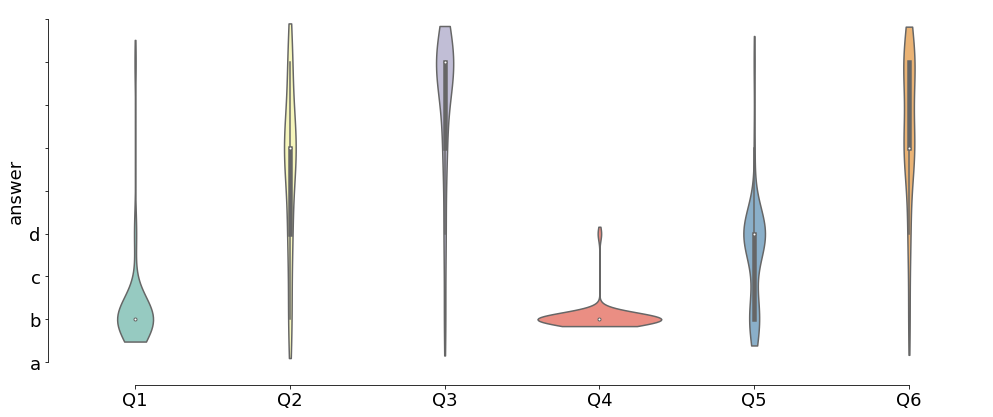

In [14]:
fig3, axes = matplotlib.pyplot.subplots(figsize=(14, 6), sharex=True)

ax = sns.violinplot(data=data[(data.iloc[:,-1] == 5)].iloc[:,5:11], palette="Set3", cut=1)

ax.set(ylabel='answer')
ax.set(yticklabels=['a', 'b', 'c', 'd'])
matplotlib.pyplot.tight_layout()
sns.despine(offset=10, trim=True)

# Lastly, let's have a look at the average test scores for Dr. Tepper's complete section as a line plot

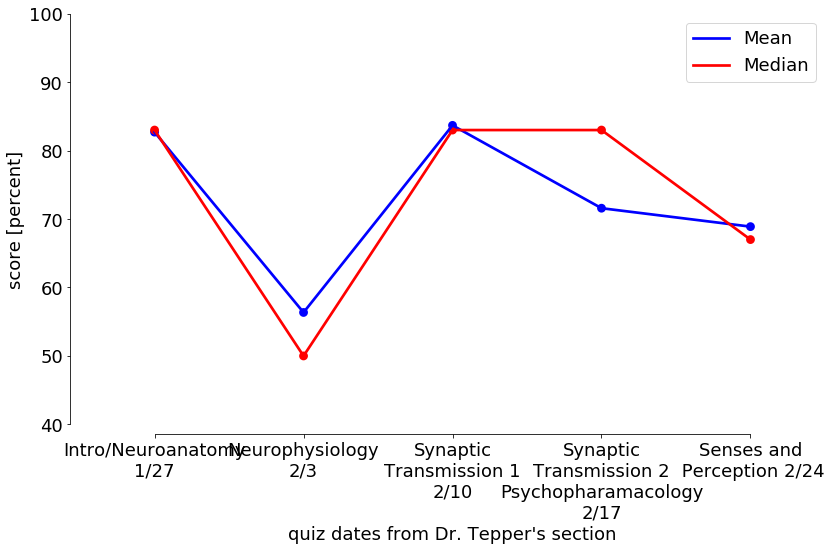

In [15]:
fig4 = matplotlib.pyplot.figure(figsize=(12, 8))

ax = sns.pointplot(x="quiz", y="percent", ci=None, estimator=np.mean, data=data, color='b')
sns.pointplot(x="quiz", y="percent",  ci=None, estimator=np.median, data=data, ax=ax, color='r')

ax.set(ylabel='score [percent]')
ax.set(ylim=[40, 100])

ax.set(xlabel="quiz dates from Dr. Tepper's section")
ax.set(xticklabels=['Intro/Neuroanatomy\n1/27', 'Neurophysiology\n2/3', 
                    'Synaptic\nTransmission 1\n2/10', 'Synaptic\nTransmission 2\nPsychopharamacology\n2/17',
                   'Senses and\n Perception 2/24'])

ax.legend(['Mean', 'Median'])

sns.despine(offset=10, trim=True)
matplotlib.pyplot.tight_layout()